#Import Pandas, csv files, seaborn#


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)


##Copy dataframes to a new dataframe##

In [60]:
#copy orderlines df
ol_df = orderlines_qu.copy()
ol_df

#copy orders df
orders = orders_qu.copy()
orders

#copy the products dataframe
category_type_df = products_cl.copy()

#copy the brands df to new df
brands = brands.copy()

# 1. Create a new column 'short'by slicing the first 3 Characters of sku's column

In [61]:
#slice sku's first 3 characters and store in short column, newly created
category_type_df['short'] = category_type_df['sku'].str.slice(0, 3)

#merge products with brands
category_type_df = category_type_df.merge(brands, on = 'short')

# 2. Create a new column 'Category'#
create a new column in products dataframe and name the column as 'Category'. This column needs to be filled with Category's name. They are found by grouping the type and long columns. 


In [ ]:
#new category column is created and empty
category_type_df["category"] = ""
category_type_df.category.value_counts()
#groupby type and long columns and find 40 largest sku's
category_type_df.groupby(["type", "long"], as_index=False).count().nlargest(40, "sku")

##2.1. Listing the categories.
categories are listed from name and desc columns. We just took 40 largest sku's from the big dataframe.

In [63]:
category_type_df.loc[category_type_df["type"] == "12175397", "category"] = "servers"

# mobile phone and laptop cases protection, digital pens..
category_type_df.loc[category_type_df["type"].isin(["12635403","11821715", "11865403","11905404", "13835403","24215399","5720","1229","42945397","8696", "5,49E+11","13555403","1216","5405","2449"]),"category"] = "tech accessories"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df.name.str.contains("case",case=False)),"category"] = "tech accessories"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df['name'].str.contains("folio", case = False)),"category"] = "tech accessories"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df['name'].str.contains("cover", case = False)),"category"] = "tech accessories"
category_type_df.loc[category_type_df["type"].isin(["24895185","24885185"]), "category"] = "smart watches"
category_type_df.loc[category_type_df["type"].isin(["1282","5,74E+15","2158","1,02E+12","118692158","5,39E+11","2,16E+11","21632158","2,17E+11"]), "category"] = "apple computers&laptops"
category_type_df.loc[category_type_df["type"].isin(["57445397","1364","42945397"]), "category"] = "storage"
category_type_df.loc[category_type_df["type"].isin(["1230","12585395","5395","1325"]), "category"] = "adapters & cables"

# batteries, headsets, keyboards, speaker
category_type_df.loc[category_type_df["type"].isin(["13615399","5399","1296","1515","13005399","13855401","5384","5398"]), "category"] = "computer parts"
category_type_df.loc[category_type_df["type"].isin(["1433","12215397","12655397","12995397","11935397"]), "category"] = "storage"
category_type_df.loc[category_type_df["type"].isin(["1334","11935397"]), "category"] = "network devices"
category_type_df.loc[category_type_df["type"].isin(["1,44E+11"]), "category"] = "repair services"
category_type_df.loc[category_type_df["type"].isin(["1405"]), "category"] = "tablets"
category_type_df.loc[category_type_df["type"].isin(["1392","21485407","12645406","14305406","21535407"]), "category"] = "others"
category_type_df.loc[category_type_df["type"].isin(["85651716","51601716","1716"]), "category"] = "smartphone"
category_type_df.loc[category_type_df["type"].isin(["1298"])&(category_type_df.desc.str.contains("monitor",case=False))&(category_type_df.price > 200),"category"] = "computer parts"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df.desc.str.contains("server",case=False)),"category"] = "servers"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df['name'].str.contains("adapter", case = False)),"category"] = "adapters & cables"
category_type_df.loc[category_type_df["type"].isin(["1298"])&(category_type_df.price <100)&(category_type_df["name"].str.contains("cable", case = False)),"category"] = "adapters & cables"
category_type_df.loc[(category_type_df.category.isin([""]))&(category_type_df.name.str.contains("iPad"))&(category_type_df.price > 400),"category"] = "tablets"
category_type_df.loc[(category_type_df.category.isin([""]))&(category_type_df.price > 400)&(category_type_df.name.str.contains("iPhone")),"category"] = "smartphone"
category_type_df.loc[(category_type_df.category.isin([""]))&(category_type_df.price > 400)&(category_type_df.name.str.contains("iMac")),"category"] = "apple computers&laptops"
category_type_df.loc[(category_type_df.category.isin([""]))&(category_type_df.desc.str.contains("memory",case = False)),"category"] = "storage"
category_type_df.loc[(category_type_df["type"].isin(["1298"]))&(category_type_df.category == "")&(category_type_df.price <100)&(category_type_df["desc"].str.contains("drive", case = False)),"category"] = "storage"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.price <100)&(category_type_df["name"].str.contains("cable", case = False)),"category"] = "adapters & cables"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.price <100)&(category_type_df["name"].str.contains("case", case = False)),"category"] = "tech accessories"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.price >400)& (category_type_df["name"].str.contains("Mac"))&(category_type_df.long == "Apple"),"category"] = "apple computers&laptops"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.price >300)& (category_type_df["name"].str.contains("iPad")),"category"] = "tablets"
category_type_df.loc[(category_type_df.category == "")&(category_type_df["name"].str.contains("tablet")),"category"] = "tablets"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.desc.str.contains("connector"))&(category_type_df.price < 100),"category"] = "adapters & cables"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.desc.str.contains("GB", case=False))&(category_type_df.desc.str.contains("SSD")),"category"] = "storage"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.name.str.contains("installation", case = False)), "category"] = "repair services"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.name.str.contains("drive")),"category"] = "storage"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.name.str.contains("iPad",case=False))&(category_type_df.price >200),"category"] = "tablets"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.name.str.contains("iPad",case=False))&(category_type_df.price <100)&(~category_type_df.desc.str.contains("service", case=False)),"category"] = "tech accessories"
category_type_df.loc[category_type_df.category == "", "category"] = "others"

In [ ]:
category_type_df

In [64]:
category_type_df.loc[(category_type_df.category == "")&(category_type_df.long =="OWC"),:]
category_type_df.loc[(category_type_df.category == "")&(category_type_df.name.str.contains("iPad",case=False))&(category_type_df.price <100)&(~category_type_df.desc.str.contains("service", case=False)),:]

,sku,name,desc,price,in_stock,type,short,long,category


#2.2 Checking for brands and 5 largest ones

In [9]:
category_type_df.groupby("long")["sku"].count().nlargest(5)

long
Apple              2070
Pack               1396
OWC                 354
Belkin              219
Western Digital     208
Name: sku, dtype: int64

##counting the values in category column from products dataframe##

In [10]:
category_type_df.category.value_counts() # 900 are uncategorized

tech accessories           2963
apple computers&laptops    1156
storage                    1028
servers                     955
others                      900
computer parts              772
network devices             669
adapters & cables           549
tablets                     265
smartphone                  262
repair services             153
smart watches               134
Name: category, dtype: int64

In [12]:
#here we merge the dataframes with products and brands
category_type_df

,sku,name,desc,price,in_stock,type,short,long,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI,Rain Design,tech accessories
1,RAI0014,Rain Design iSlider iPad Support,Anodized aluminum support multiposition iPad a...,49.99,0,1216,RAI,Rain Design,tech accessories
2,RAI0015,Rain Design MTower support MacBook Air / Pro,Aluminum support for MacBook Pro and MacBook Air,59.99,1,8696,RAI,Rain Design,tech accessories
3,RAI0016,Rain Design iLevel2 MacBook Support,Adjustable aluminum bracket height compatible ...,84.99,1,8696,RAI,Rain Design,tech accessories
4,RAI0018,"Rain Design Mbase Support for iMac 27 """,Minimalist support lifting drawer iMac 27,84.99,1,8696,RAI,Rain Design,tech accessories
...,...,...,...,...,...,...,...,...,...
9801,RYV0009,Ryval Base Magnetic Qi Wireless Charging Office,Wireless charging base Ryval magnetic and Qi t...,49.99,0,5399,RYV,Ryval,computer parts
9802,RYV0010,Ryval magnetic Qi Wireless Car Charger,Ryval magnetic car charger and Qi Wireless tec...,49.99,0,5399,RYV,Ryval,computer parts
9803,MTF0008,Mistify Clean Screens Natural 500ml.,Spray cleaning screens and keyboards.,14.99,1,12085400,MTF,Mistify,others
9804,SDE0007,SDesign iPhone charging dock QI X / 8 / Apple ...,Base load compatible with iPhone and Apple Wat...,69.99,0,5399,SDE,SDesign,computer parts


In [13]:
#groupby long and category columns and list the top 10 brands
top10_brands_df = category_type_df.groupby(["long", "category"], as_index=False)["price"].mean().nlargest(10, 'price')
top10_brands_df                       
                    

,long,category,price
251,Pack,apple computers&laptops,3591.624000
271,Promise,network devices,3311.649231
13,Apple,apple computers&laptops,3167.747726
272,Promise,storage,1881.990000
93,G-Technology,network devices,1448.179495
71,Drobo,network devices,1358.220000
255,Pack,servers,1250.411382
316,Sonnet,servers,1208.790000
74,Drobo,storage,1029.000000
75,Eizo,computer parts,982.835000


#Plotting a graph against categories and price of the product

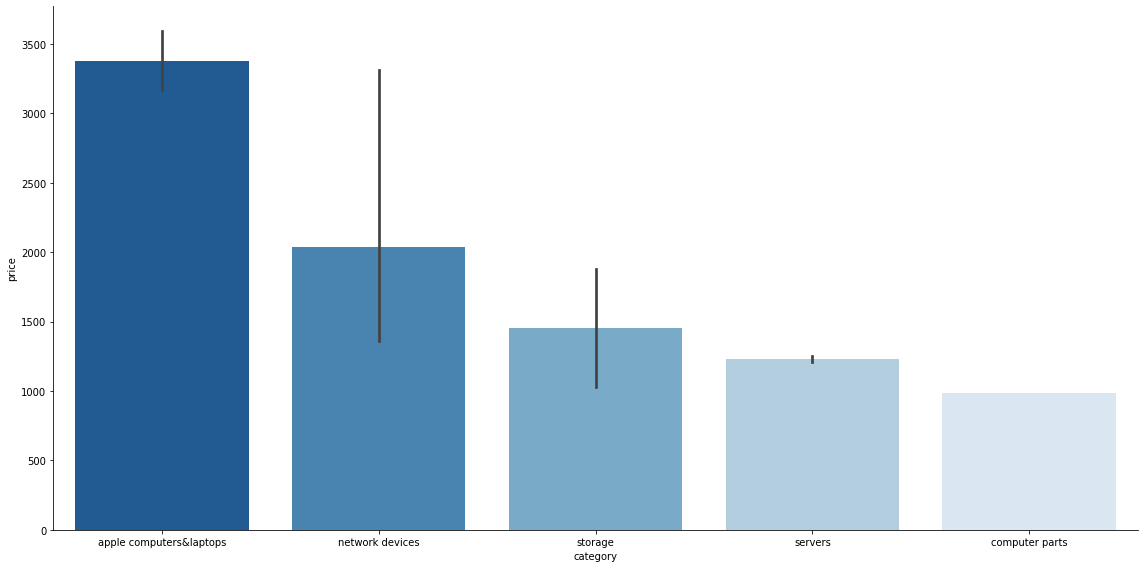

In [14]:
sns.catplot(kind="bar",
            data=top10_brands_df,
            x="category",
            y="price",
            height=8,
            aspect=2,
            palette="Blues_r");

#Plotting the graph against brands and price of the products

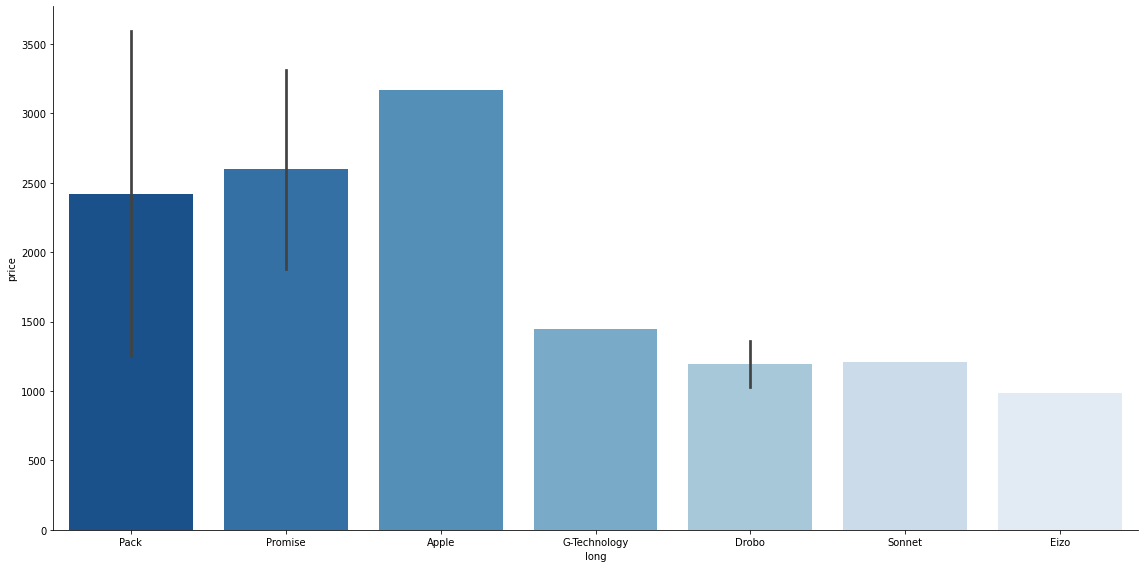

In [15]:
sns.catplot(kind="bar",
            data=top10_brands_df,
            x="long",
            y="price",
            height=8,
            aspect=2,
            palette="Blues_r");

#unit_price_total column is created#
 by multiplying product_quantity and unit_price columns from orderlines dataframes.

In [16]:
ol_df["unit_price_total"] = ol_df["product_quantity"] * ol_df["unit_price"]
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


#merging orderlines with orders df##
Herewe create a new column 'difference' from substracting total_paid and unit_price_total 

In [ ]:
#merging orderlines with orders df 
diff_df = ol_df.merge(orders, how = 'inner', left_on="id_order",  right_on="order_id")
diff_df                           

In [18]:
#difference column is created by substracting total_paid and unit_price_total
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]
diff_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,order_id,created_date,total_paid,state,difference
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,299545,2017-01-01 01:51:47,51.48,Completed,3.99
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,299546,2017-01-01 01:57:34,18.99,Completed,0.00
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,295347,2017-01-01 02:02:38,72.19,Completed,0.00
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,299556,2017-01-01 02:30:08,65.89,Completed,4.99
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299561,2017-01-01 02:39:47,154.48,Completed,11.99


# Merge the dataframes of orderlines and products#
Let's create a new column for discounts by substracting price from unit_price 

In [ ]:
#merge orderlines and products df's
merged_df = ol_df.merge(category_type_df, how = 'inner', on = 'sku')
#Now, create a new column 'discount' by substracting price and unit_price columns from merged df's
merged_df['discount'] = merged_df.price - merged_df.unit_price
merged_df

#Let's Analyse the discounts#


In [20]:
# checking for negative values in discount column
(merged_df.discount < 0).sum().sum()

1571

In [21]:
# removing the negative values from discount column
merged_df = merged_df.loc[merged_df.discount > 0]
(merged_df.discount < 0).sum()

0

In [22]:
# adding discount in percentages
merged_df['discount_%'] = (merged_df.discount * 100)/merged_df.price
merged_df['discount_%']

0        22.134776
1        22.134776
2        18.035744
3        18.035744
4        18.035744
           ...    
53190    41.506918
53191    15.161616
53192    15.161616
53193    21.938168
53194    39.767126
Name: discount_%, Length: 49369, dtype: float64

In [ ]:
# adding discount in percentages
merged_df['discount_%'] = (merged_df.discount * 100)/merged_df.price
merged_df

In [ ]:
# removing some columns because it's easier without them          ##example : df.drop(['B', 'C'], axis=1)
merged_df.drop(["type", "id", "product_id", "desc", "in_stock"], axis = 1)

In [ ]:
merged_df.sample(20)

#Does revenue grow when discounts increase?#

###Converting date column to datetime datatypes###
We also create spearate columns like, quarter, year, month from date column.

In [ ]:
#converting date column to datetime datatypes
merged_df["date"] = pd.to_datetime(merged_df["date"])
merged_df.info()

In [31]:
merged_df["quarter"]= merged_df["date"].dt.quarter

In [32]:
merged_df["year"] = merged_df["date"].dt.year

In [33]:
merged_df["month"] = merged_df["date"].dt.month

##checking revenue for Jan and Feb 2017 ##

In [27]:
# revenue count for january 2017
january_2017 = merged_df.loc[(merged_df.date.dt.month == 1) & (merged_df.date.dt.year == 2017)]
january_2017 = january_2017.unit_price_total.sum()
january_2017     #516070.96


# revenue count for february 2017
february_2017 = merged_df.loc[(merged_df.date.dt.month == 2) & (merged_df.date.dt.year == 2017)]
february_2017 = february_2017.unit_price_total.sum()
february_2017      #277855.35


277855.35

###Check the revenue_growth (increase or decrease) in percentages###

In [28]:
# increase or decrease in percentages
revenue_Growth1 = ((february_2017 - january_2017)/january_2017)*100
print("Change: ", revenue_Growth1, "%")
# The revenue has dropped 46.2% in february when they offered on average smaller discounts

Change:  -46.15946807004991 %


##analyze the discounts in january and february##

In [29]:
# analyze the discounts in january and february
january_2017_discounts = merged_df.loc[(merged_df.date.dt.month == 1) & (merged_df.date.dt.year == 2017)]
january_2017_discounts = january_2017_discounts['discount_%'].mean()
january_2017_discounts # avg discounts offered in january are 27.75%

february_2017_discounts = merged_df.loc[(merged_df.date.dt.month == 2) & (merged_df.date.dt.year == 2017)]
february_2017_discounts = february_2017_discounts["discount_%"].mean()
february_2017_discounts # avg discounts offered in february are 22.4%

print(january_2017_discounts, february_2017_discounts)

27.754722155419405 22.390884705172073


Conclusion: The revenue dropped in february, but also did the discounts!

The reason can also be smaller demand

#Checking discounts for categories quarterly and yearly#

In [34]:
# calculating discounts that are offered monthly, yearly and quarterly with categories and sorting them
discounts_category_df = merged_df.groupby(['quarter','year', "category"], as_index=False)["discount_%"].mean().sort_values(by = 'discount_%', ascending = False).nlargest(10, 'discount_%')
discounts_category_df

,quarter,year,category,discount_%
43,3,2017,smart watches,42.771814
41,3,2017,repair services,42.105087
17,1,2018,repair services,37.524272
29,2,2017,repair services,37.499746
0,1,2017,adapters & cables,37.100065
5,1,2017,repair services,36.466193
53,4,2017,repair services,32.838966
11,1,2017,tech accessories,31.289868
47,3,2017,tech accessories,30.944245
23,1,2018,tech accessories,30.664006


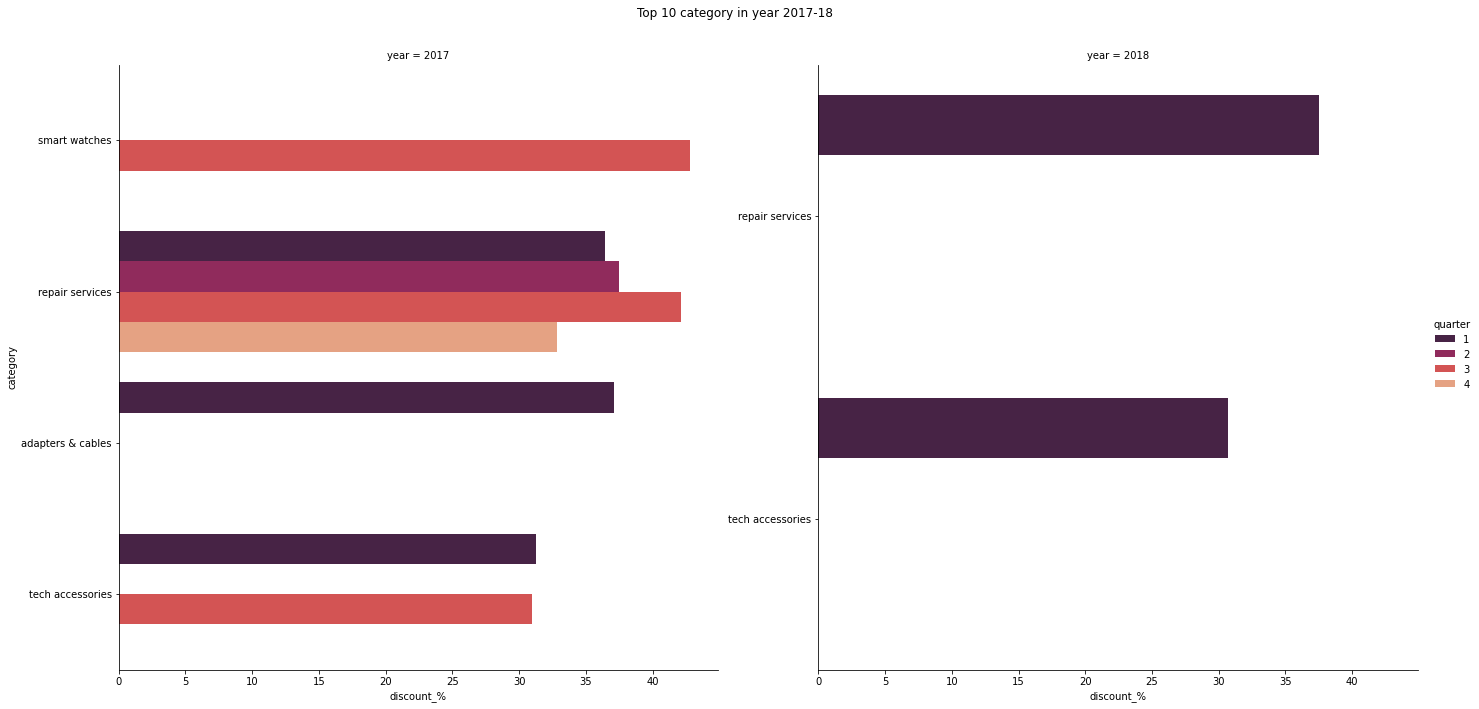

In [35]:
(
sns.catplot(kind="bar", 
            data=discounts_category_df, 
            x="discount_%", 
            y="category", 
            hue='quarter',
            col="year", 
            palette="rocket",
            aspect=1,
            height=10,
            sharey=False)
    # when we have multiple plots, such as when using col or row, we need to use suptitle, and not the normal title
    .figure.suptitle("Top 10 category in year 2017-18")
    .figure.subplots_adjust(top=.90)
)

#Discounts for brands#

In [36]:
# calculating discounts that are offered by month and sorting them
merged_df.groupby([merged_df["date"].dt.year, merged_df["date"].dt.month, "long"], as_index=False)["discount_%"].mean().sort_values(by = 'discount_%', ascending = False)
#discounts_long_df

,long,discount_%
174,Opulus,77.744436
67,Opulus,77.519380
237,Jawbone,77.164764
1441,Mophie,76.336994
147,Jawbone,76.246129
...,...,...
814,Elgato,0.021744
910,Booq,0.021111
383,Booq,0.020000
800,Booq,0.020000


#Calculating discounts and revenue for Categories, yearly#

In [54]:
# calculating discounts that are offered by month and sorting them
discounts_long_df = merged_df.groupby(['year','month', 'quarter', "category"], as_index=False).agg({'discount_%':'mean', 'unit_price_total':'sum'}).sort_values(by = 'unit_price_total', ascending = False)
discounts_long_df

,year,month,quarter,category,discount_%,unit_price_total
117,2017,11,4,computer parts,21.732007,295205.40
123,2017,11,4,smartphone,11.027435,282021.36
124,2017,11,4,storage,19.261157,242255.50
135,2017,12,4,smartphone,10.367817,230965.36
9,2017,1,1,storage,20.643351,162336.58
...,...,...,...,...,...,...
73,2017,7,3,repair services,41.071364,194.92
28,2017,3,1,servers,2.556963,171.49
168,2018,3,1,repair services,35.012901,150.95
61,2017,6,2,repair services,41.543675,106.96


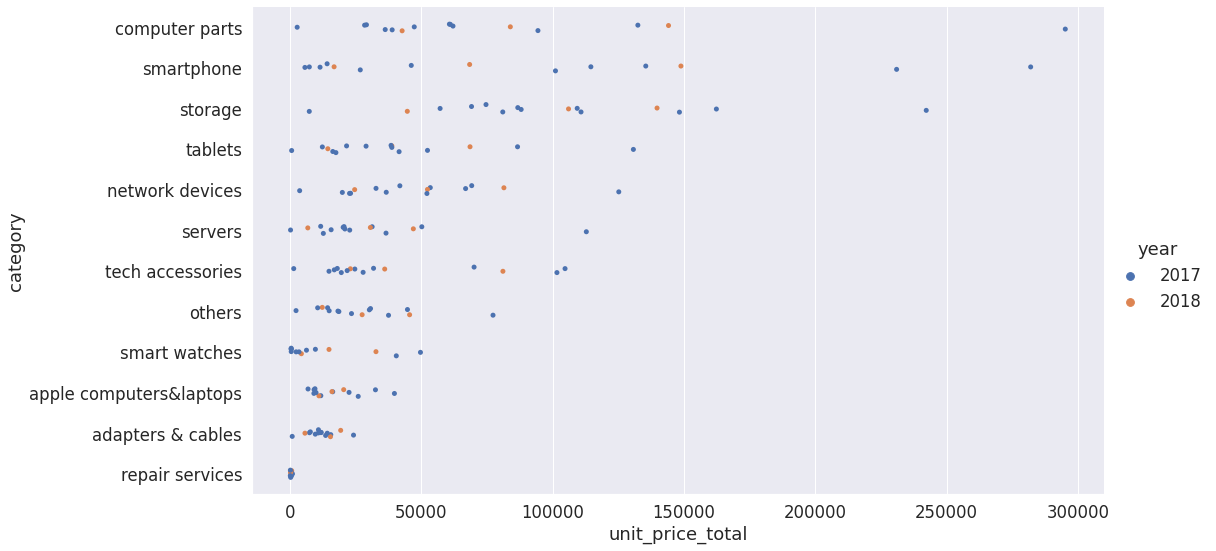

In [55]:
#plt.legend(title='Company', fontsize=20)
sns.set(font_scale=1.5)
sns.catplot(data= discounts_long_df,
            x="unit_price_total",
            y="category",
            hue ='year',
            height=8,
            aspect=2,
            );

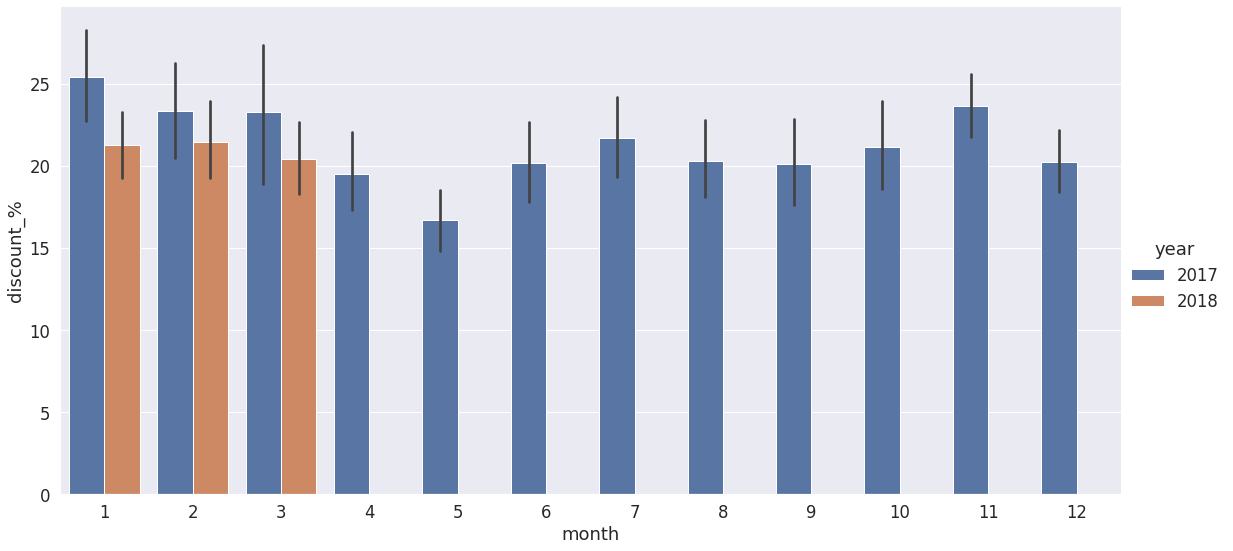

In [38]:
#plt.legend(title='Company', fontsize=20)
sns.set(font_scale=1.5)
sns.catplot(kind='bar',
            data= discounts_long_df,
            x="month",
            y="discount_%",
            hue ='year',
            height=8,
            aspect=2,
            );

There is no relationship between discounts offered by categories and the income these categories make!

Storage devices and smartphones are the categories with the highest earnings, but they don't offer large discounts.

#Calculating revenue for max. and min. months when discounts were offered in 2017#

In [39]:
# now I am comparing the revenue between months with max discounts offered and months with min discounts offered
# in this case January, 2017 & May, 2017

# revenue count for january 2017m already did that in the previous section
january_2017 = merged_df.loc[(merged_df.date.dt.month == 1) & (merged_df.date.dt.year == 2017)]
january_2017 = january_2017.unit_price_total.sum()
# revenue count for may 2017
may_2017 = merged_df.loc[(merged_df.date.dt.month == 5) & (merged_df.date.dt.year == 2017)]
may_2017 = may_2017.unit_price_total.sum()

# increase in percentages when discounts are offered --- ((final value - initial value)/initial)*100
revenue_Growth_July_May = ((january_2017 - may_2017)/may_2017)*100
print(revenue_Growth_July_May)
print("Income in May: ", may_2017)
print("Income in January: ", january_2017)
# There is a difference and increase in profit 84 % when the discounts are offered
# The number increases by 84 % its original value

# decrease in %
decrease = ((may_2017 - january_2017)/ january_2017) * 100
decrease # 45.6 %

83.82948298548328
Income in May:  280733.51
Income in January:  516070.96


-45.601761819731145

##Checking for bigger and smaller discounts##

In [40]:
# Another check is grouping the first couple of months with bigger discount offer and the last couple of months
# with the smaller offer

months_with_bigger_discounts = (
    merged_df.loc[(merged_df.date.dt.strftime("%Y-%m") == "2017-07") 
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-01")
    | (merged_df.date.dt.strftime("%Y-%m") == "2018-03")
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-03")]
    )
months_with_bigger_discounts = months_with_bigger_discounts.unit_price_total.sum()

months_with_smaller_discounts = (
    merged_df.loc[(merged_df.date.dt.strftime("%Y-%m") == "2017-12") 
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-04")
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-05")
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-06")]
    )
months_with_smaller_discounts = months_with_smaller_discounts.unit_price_total.sum()

decrease_in_percentages = ((months_with_bigger_discounts - months_with_smaller_discounts)/months_with_smaller_discounts) * 100
increase_in_percentages = ((months_with_smaller_discounts - months_with_bigger_discounts)/months_with_bigger_discounts) * 100
(print("There is a", increase_in_percentages, "% increase and a", 
       decrease_in_percentages, "% decrease when comparing Small avg discount offering months" 
       ,"with Large avg discount offering months."))

There is a 30.44520881567317 % increase and a -23.339461136279876 % decrease when comparing Small avg discount offering months with Large avg discount offering months.


###Checking for discounts for 2018###

In [41]:
# One last check is comparing last months in the data set. 
# Janury, February and Mar, 2018
jan_2018 = merged_df.loc[(merged_df.date.dt.month == 1) & (merged_df.date.dt.year == 2018)]
jan_2018 = jan_2018.unit_price_total.sum()
jan_2018 # 825.957

feb_2018 = merged_df.loc[(merged_df.date.dt.month == 2) & (merged_df.date.dt.year == 2018)]
feb_2018 = feb_2018.unit_price_total.sum()
feb_2018 # 494.539

mar_2018 = merged_df.loc[(merged_df.date.dt.month == 3) & (merged_df.date.dt.year == 2018)]
mar_2018 = mar_2018.unit_price_total.sum()
mar_2018 # 206.422

# discounts are aprox. the same, but the income is very different

206017.13

#Revenue earned by the Company for 2017-18#

In [42]:
# Which months did the company earn the most?
(
    merged_df.groupby([merged_df["date"].dt.year, merged_df["date"].dt.month])['unit_price_total']
    .sum().sort_values(ascending = False)
)

date  date
2017  11      1472241.99
      12       954460.92
2018  1        824623.02
2017  7        542819.07
      1        516070.96
      10       510733.95
2018  2        494408.65
2017  9        355711.06
      8        342811.93
      5        280733.51
      2        277855.35
      6        233123.87
      4        206273.19
2018  3        206017.13
2017  3         18843.70
Name: unit_price_total, dtype: float64

I don't think there is any special connection to discounts, because the highest earning months are not offering the highest discounts. However discounts shouldn't be abolished completely because they attract customers?

#Let's compare the discounts and revenue for 2017-18#

In [43]:
t = (
    merged_df
    .groupby([merged_df["date"].dt.year, merged_df["date"].dt.month])
    .agg({'discount_%':'mean', 'unit_price_total':'sum'})
    )
t

discount_%  unit_price_total
date date                              
2017 1      27.754722         516070.96
     2      22.390885         277855.35
     3      24.141249          18843.70
     4      20.818562         206273.19
     5      18.293660         280733.51
     6      20.365965         233123.87
     7      27.153841         542819.07
     8      22.543930         342811.93
     9      22.508217         355711.06
     10     23.691314         510733.95
     11     22.565922        1472241.99
     12     20.331169         954460.92
2018 1      23.491285         824623.02
     2      23.736805         494408.65
     3      23.915563         206017.13

##Checking for dicounts and revenue of brands##
We check quarterly and yearly discounts and revennue of brands.
Also, plot graph for clear visulization. 

In [44]:
t = (
    merged_df
    .groupby(['year','quarter', 'long'], as_index = False)
    .agg({'discount_%':'mean', 'unit_price_total':'sum'}).nlargest(20, 'unit_price_total')
    )
t

,year,quarter,long,discount_%,unit_price_total
377,2017,4,Apple,15.606820,1123158.84
517,2018,1,Apple,16.292027,488549.51
247,2017,3,Apple,20.478594,457751.68
428,2017,4,LaCie,14.441493,165713.57
128,2017,2,Apple,15.297718,162502.36
455,2017,4,OWC,22.289060,150184.46
461,2017,4,Pack,34.460144,136801.55
504,2017,4,Western Digital,20.809355,128335.71
503,2017,4,Wacom,23.218389,125939.69
426,2017,4,LG,11.141336,108807.48


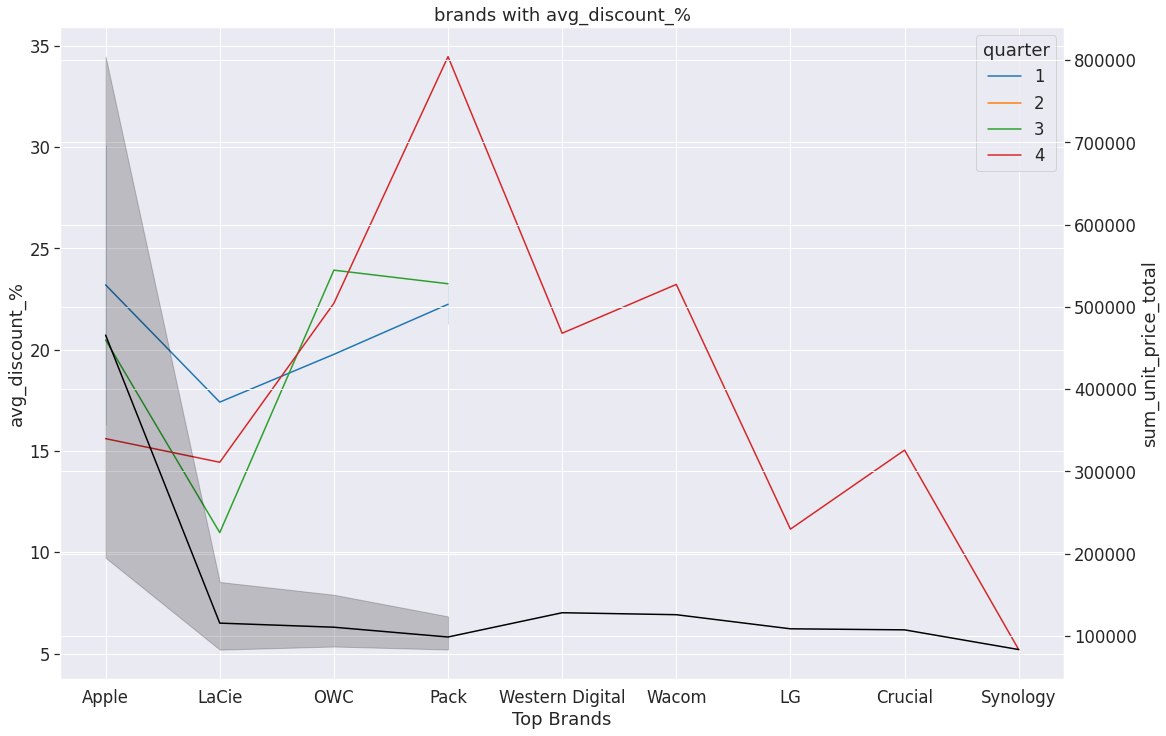

In [45]:

# Create the plot
fig, ax1 = plt.subplots(figsize=(18,12))
sns.lineplot(data=t, x="long", y="discount_%", ax=ax1, hue='quarter', palette="tab10")
# Create a second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=t, x="long", y="unit_price_total", ax=ax2, color='black')
# Set the titles and labels
ax1.set_title('brands with avg_discount_%')
ax1.set_xlabel('Top Brands')
ax1.set_ylabel('avg_discount_%')
ax2.set_ylabel('sum_unit_price_total')
# Show the plot
plt.show()

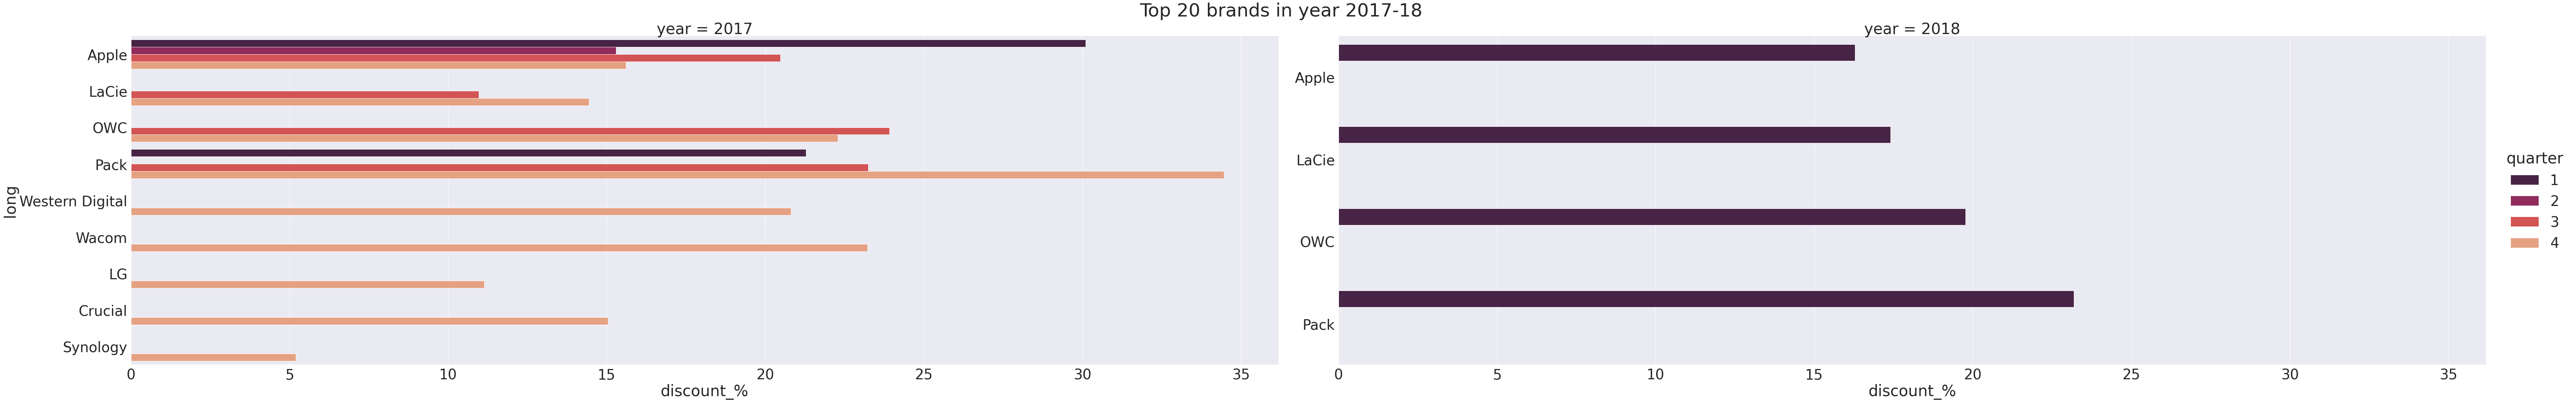

In [46]:
sns.set(font_scale=3.5)

(
sns.catplot(kind="bar", 
            data=t, 
            x="discount_%", 
            y="long", 
            hue='quarter',
            col="year", 
            color="dodgerblue",
            aspect=3,
            height=16,
            sharey=False,
            palette="rocket")
    # when we have multiple plots, such as when using col or row, we need to use suptitle, and not the normal title
    .figure.suptitle("Top 20 brands in year 2017-18")
    .figure.subplots_adjust(top=.90)
)

The least contributing brands are offering higher discounts: on average 40 %.
Discounts had little impact on profit in the observed period.